In [1]:
%reset -f
from pythonrc import *


In [2]:

time_step = 0.5

actuators = [tunnel, voithschneider_port, voithschneider_starboard]
force_torque_components = [
    skadipy.allocator.ForceTorqueComponent.X,
    skadipy.allocator.ForceTorqueComponent.Y,
    skadipy.allocator.ForceTorqueComponent.N,
]

allocators = []
gamma = [1e-2, 1e-2, 1e-2]
mu    = [1e-1, 1e-1, 1e-1]
rho   = [1.0e1, 1.0e1, 1.0e1]
lambda_p = [1.0, 0.5, 0.0]

for g,m,r,l in zip(gamma, mu, rho, lambda_p):

    allocators.append(skadipy.allocator.reference_filters.MinimumMagnitudeAndAzimuth(
        actuators=actuators, force_torque_components=force_torque_components,
        gamma=g, mu=m, rho=r, time_step=time_step, lambda_=l
    ))

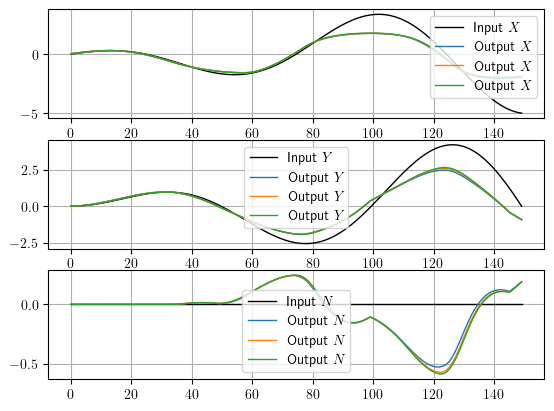

In [3]:
data = generate_spiral_dataset(
    num_points=150,
    num_turns=1.5,
    k=5
)

tau_cmd = np.concatenate(
    (data, np.zeros((np.shape(data)[0], 4))),
    axis=1
)
d_tau_cmd = np.gradient(tau_cmd, axis=0) / time_step

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd=tau_cmd, d_tau_cmd=d_tau_cmd, allocators=allocators)
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

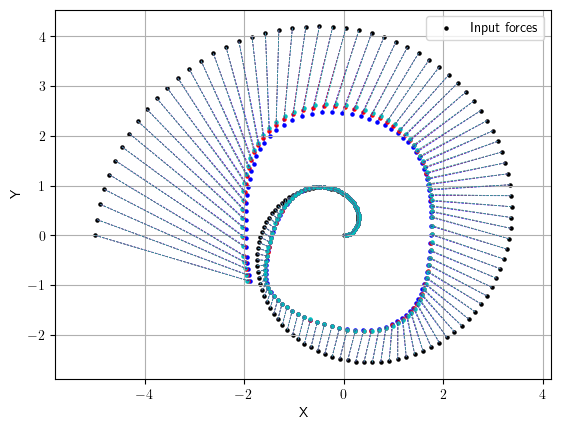

In [4]:
plot_2d_allocation(tau_cmd=tau_cmd, allocators=allocators, tau_hist=tau_hist)

plt.grid(True)
plt.axis('equal')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [5]:
# scipy.io.savemat(
#     'result_4.mat',
#     {
#         "inputs": tau,
#         "xi": xi,
#         "outputs": allocated,
#         "rho": rho,
#         "mu": mu,
#         "gamma": gamma,
#         "attributes": voithschneider_port.extra_attributes,
#     }
# )

# save_mat(
#     filename="data/15.mat",
#     inputs=tau,
#     xi=xi_all,
#     thetas=theta_all,
#     outputs=allocated,
#     rho=rho,
#     gamma=gamma,
#     mu=mu,
#     lambda_p=lambda_p,
#     thruster=voithschneider_port
# )